# Training Wheel Exercise: Renal Cancer Data

Objective: 
Identifying relevant features is a common procedure in biological research (e.g gene expression and protein expression studies). Hence, comprehensive understanding of its workflow is mandatory. 

The purpose of this exercise is to provide an introduction into the conventional pipeline for pathway enrichment studies. More specifically, protein expression data will be analysed. Here, we are employing commonly-used feature selection methods e.g. t-test, recursive feature elimination, and selecting top proteins based on statistical p-value ranks. Subsequently, the frequently used hypergeometric enrichment tool will be utilised to evaluate enrichment of these protein features to pathways. 

The results from this exercise can also be used as a benchmark as we perform feature selection through "fuzzy-logic" tools in future studies. 

Footnote: 
This notebook also serves as a logbook for BS9001.

### Installation of packages 

We first install the packages that are required for analyses. Do ensure that pip is already installed, otherwise, download pip in the command line. 
Installation is not required if it's already done so. 

In [1]:
#to install the libraries and packages required 
#before this run, download pip in command line 
!pip install pandas
!pip install sklearn 
!pip install matplotlib
!pip install numpy
!pip install bioinfokit
!pip install combat
!pip install seaborn

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
  Using cached combat-0.3.0-py3-none-any.whl (36 kB)
  Using cached mpmath-1.1.0.tar.gz (512 kB)
  Using cached numpy-1.18.5.zip (5.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... error
    ERROR: Command errored out with exit status 1:
     command: /usr/local/opt/python@3.9/bin/python3.9 /usr/local/lib/python3.9/site-packages/p

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


### Data preparation 
In this exercise, the well-studied renal cancer (RC) data will be used for analyses.

Some of the characteristics of the RC data include the following: 
- Protein expression data 
- "Cleaned" data 
- Two groups of patients: normal (control) and cancer (case) group
- Consist of 6 patients in each group with data obtained in duplicates 
- Consist of 3123 protein expression genes 
- Dimensions: 3123 rows x 24 columns  

Firstly, data transformation needs to be performed in order to render the RC data appropriate for subsequent analyses. 

In [1]:
#Data preparation 
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from __future__ import division
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#transpose and convert first column as header, generate the feature tables
geneaggregate = pd.read_csv('RC_data.csv')
df = geneaggregate[sorted(geneaggregate.columns)]
dfT = df.swapaxes("index", "columns")
new_header = dfT.iloc[0] #grab the first row for the header
featuretable = dfT[1:] #take the data less the header row
featuretable.columns = new_header #set the header row as the df header

#store the protein expression values and protein gene names 
samples = featuretable.values
sample_names = featuretable.columns

print(featuretable)

Unnamed: 0              Q9UBE0  Q9BSJ8  P02656 O95741  P09651  P55809  Q15631  \
cancer_cc_patient1_rep1  40914   41185  274731   4969  103836  101089  102971   
cancer_cc_patient1_rep2  45120   42150  284693   5472  118185   97593  110008   
cancer_cc_patient2_rep1  44113  113386  141656   7872  162475  137794  112840   
cancer_cc_patient2_rep2  47835  139305  155864   7957  170174   99304  129621   
cancer_cc_patient3_rep1  26957   35891  161075   6111  101960   88960   92826   
cancer_cc_patient3_rep2  26005   30788  124223   3722   82866   68415   75856   
cancer_cc_patient6_rep1  35712   52750  194500   4094  118675  117222  142954   
cancer_cc_patient6_rep2  30517   33753  166061   3580   83659   85197   92312   
cancer_cc_patient7_rep1  38094   62466  177344   5878   95034   96055   97456   
cancer_cc_patient7_rep2  26654   45894  133566   4066   71776   54583   58171   
cancer_cc_patient8_rep1  48576  113950  121262   5700  175963  122041  114483   
cancer_cc_patient8_rep2  290

### Batch Correction through ComBat
Biological data are often obtained in batches. Technical sources of variation across batches, can lead to heterogenity across batches of data (e.g. different experiment personnels, different experimental instruments) - also known as batch effects.

Batch effects can potentially confound data, and lead to discrepancies in statistical testing. Such discrepancies can obscure revelation of important explanatory variables in datasets (e.g. subpopulations). 
Hence, batch correction is often an imperative step to ensure that discoveries made from the data in question are truly meaningful and relevant.

ComBat is a widely used tool and data harmonization technique for correction of batch effects in microarray expression data, through the empirical Bayes methods. In this exercise, we utilise pyComBat, a Python 3 language implementation tool of ComBaT (https://doi.org/10.1101/2020.03.17.995431) for batch correction of the RC data. 

In [2]:
from combat.pycombat import pycombat
#transform data into suitable format for batch correction 
df2 = df.set_index("Unnamed: 0")
df2_logtransformed = np.log2(df2)
#perform batch correction
batch = [1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2]
df_batchcorrected = pycombat(df2_logtransformed,batch)
df_batchcorrected
df_batchcorrected_T = df_batchcorrected.T
df_batchcorrected_T

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


Unnamed: 0,Q9UBE0,Q9BSJ8,P02656,O95741,P09651,P55809,Q15631,Q96EY1,Q16706,Q9UID3,...,P50395,P21283,Q08257,P51161,Q9H2A2,P13010,O95182,P62241,Q14573,Q99436
cancer_cc_patient1_rep1,15.261891,15.120885,18.038296,12.017492,16.528783,16.445190,16.561621,16.411772,15.799947,9.758744,...,18.405452,16.562000,18.628720,17.308034,15.123830,17.612549,15.719732,16.007835,14.220463,15.628695
cancer_cc_patient1_rep2,15.497953,15.529820,18.150705,12.618507,16.929017,16.714625,16.801537,16.583596,16.366595,10.463202,...,18.688335,17.017259,19.083291,17.324651,15.663390,17.838132,16.379401,16.546066,13.282330,15.843931
cancer_cc_patient2_rep1,15.385620,16.770919,16.933262,12.765636,17.294768,16.959425,16.728772,16.168529,16.424491,11.670427,...,19.347907,15.743608,19.206320,15.860449,15.143689,18.505624,16.491129,17.533600,13.558670,16.465482
cancer_cc_patient2_rep2,15.573816,17.083958,17.372370,13.105386,17.396542,16.737107,17.008293,16.410451,16.822171,12.025418,...,19.264426,16.211847,19.607998,16.103718,15.678620,18.689095,16.846228,17.553174,13.766450,16.652416
cancer_cc_patient3_rep1,14.576160,14.896713,17.147580,12.353880,16.497590,16.233003,16.372194,15.588221,16.772132,10.355943,...,19.098558,16.310533,19.978231,15.326957,14.766795,17.997399,15.965843,16.121521,12.584503,16.010178
cancer_cc_patient3_rep2,14.782542,15.121457,17.079209,12.117356,16.473731,16.255145,16.333088,15.649463,16.350529,10.926825,...,18.794364,17.100450,19.822723,15.257468,14.907591,17.995047,16.007752,15.986019,12.556466,15.711479
cancer_cc_patient6_rep1,15.038394,15.524121,17.462149,11.702529,16.757317,16.691000,17.160792,15.765475,16.444417,11.052388,...,18.974288,16.318496,20.254488,15.489748,14.868436,18.311539,15.841342,16.530455,12.874999,16.300697
cancer_cc_patient6_rep2,14.990264,15.240991,17.454246,12.066772,16.485945,16.538912,16.580518,15.815436,16.095301,11.262754,...,18.701159,16.415987,20.113555,15.521877,15.007682,18.094609,16.080465,16.446143,12.854917,16.049570
cancer_cc_patient7_rep1,15.144517,15.799568,17.308101,12.290668,16.377236,16.360390,16.461089,15.487084,16.477755,11.028674,...,18.623409,15.757512,19.792686,15.604300,14.790046,18.057919,16.358697,16.150432,13.066281,16.324340
cancer_cc_patient7_rep2,14.814546,15.640455,17.172902,12.232309,16.289483,15.962975,15.998559,15.650491,16.217439,11.487273,...,18.617412,15.917061,19.708468,15.590775,14.971815,17.907636,15.908900,16.171063,12.728632,16.019315


In [4]:
#plot the batch corrected data 
#import matplotlib.pyplot as plt
#plt.boxplot(df_batchcorrected.transpose())
#plt.show()

## Z-Normalisation
Features in a dataset may be on drastically different scales. Some features can falsely dominate others in an unscaled data.Therefore, normalization is necessary in the pre-feature selection step to ensure that features in a data set are measured on the same scale.

In this exercise, we employ the Z-normalisation technique. This technique involves transforming each feature by subtracting its mean value and dividing by the standard deviation. The Z score exhibits the number of standard deviations away from the mean a score is. When Z is 0, the observation is at the sample’s mean. Z-normalisation can also be used to address outliers.



In [3]:
#main aim of this block is to perform z-normalisation through patients: correct way
#apply z-normalisation on transposed featuretable 
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

#z normalise the non-batch corrected data
df_znormalised_bypatients = z_score(featuretable.T)
df_znormalised = df_znormalised_bypatients.T
df_znormalised

#z normalise the batch corrected data 
df_z_bc_bypatients = z_score(df_batchcorrected)
df_z_bc_bypatients

,cancer_cc_patient1_rep1,cancer_cc_patient1_rep2,cancer_cc_patient2_rep1,cancer_cc_patient2_rep2,cancer_cc_patient3_rep1,cancer_cc_patient3_rep2,cancer_cc_patient6_rep1,cancer_cc_patient6_rep2,cancer_cc_patient7_rep1,cancer_cc_patient7_rep2,...,normal_cc_patient2_rep1,normal_cc_patient2_rep2,normal_cc_patient3_rep1,normal_cc_patient3_rep2,normal_cc_patient6_rep1,normal_cc_patient6_rep2,normal_cc_patient7_rep1,normal_cc_patient7_rep2,normal_cc_patient8_rep1,normal_cc_patient8_rep2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Q9UBE0,-0.346859,-0.409382,-0.499211,-0.563704,-0.708811,-0.563079,-0.513503,-0.472609,-0.448889,-0.518835,...,-0.611118,-0.728522,-0.733132,-0.778336,-0.853773,-0.741273,-0.771766,-0.700956,-0.692670,-0.666482
Q9BSJ8,-0.422833,-0.391945,0.287702,0.303772,-0.539444,-0.383019,-0.253348,-0.341100,-0.095716,-0.087726,...,-0.079827,-0.103782,-0.296893,-0.227794,-0.293165,-0.208017,-0.182881,-0.107584,-0.390737,-0.205947
P02656,1.149084,1.042133,0.379920,0.469446,0.649820,0.657106,0.784657,0.819778,0.717615,0.712180,...,0.291082,0.408435,1.073802,0.941727,0.715139,0.702787,0.542172,0.586997,0.756876,0.742582
O95741,-2.094959,-1.984939,-1.987479,-1.981652,-1.882971,-1.979054,-2.300188,-2.006014,-1.987551,-1.866712,...,-1.978595,-1.870295,-1.169311,-1.242841,-1.719597,-1.621854,-1.307367,-1.279425,-1.813544,-1.673388
P09651,0.335750,0.373658,0.585272,0.483331,0.306393,0.335424,0.407150,0.311893,0.215736,0.251053,...,0.324601,0.233301,0.282667,0.255999,0.222843,0.225363,0.310146,0.175832,0.078345,0.103487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P13010,0.919689,0.871101,1.273093,1.225817,1.098829,1.143677,1.239589,1.155656,1.121881,1.095697,...,0.909123,0.873641,0.864840,0.860741,0.913249,0.861813,1.080638,1.026210,1.073946,0.997276
O95182,-0.100171,0.072923,0.128769,0.167212,0.025440,0.087857,-0.083445,0.099214,0.205741,0.052396,...,0.739976,0.696628,0.795489,0.793642,0.653122,0.704423,0.657419,0.679818,0.863279,0.786876
P62241,0.055061,0.164117,0.720939,0.573306,0.107693,0.076310,0.285643,0.291016,0.093454,0.189240,...,0.230833,0.249202,-0.099574,-0.091958,0.097633,0.080004,0.144439,0.175297,-0.120971,-0.043506


## PCA: Principal Component Analysis 
Biological expression data are usually exceedingly large, with a broad number of dimensions to consider. Hence, principal component analysis (PCA) are often used as a tool to reduce the dimensionality of such datasets, in order to aid interpretation while minimising loss of information through preservation of "variability".
The PCA generates uncorrelated variables that successively maximize variance, known as the principal components (PCs).

The RC data contains 3123 protein features (genes), hence a PCA analysis would be appropriate.

In this exercise, the PCA will be employed to identify any significant clustering in the proposed RC dataset, each for the non batch-corrected and batch-corrected data respectively. We will evaluate if the PCs are able to serve as classifiers to segregate the case and control (cancer patients vs normal patients in the RC data) through formation of distinct clusters.

By performing separate PCA plots for the non batch-corrected and batch-corrected data, it allows for one to compare and visualise the significance/purpose of batch correction. PCA plots can sometimes be employed to detect batch effects through identification of PCs which are highly correlated with batch, rather than class. Although, it suffers from addressing subtle batch effects which are often obscured, as addressed in this study here
(https://pubmed.ncbi.nlm.nih.gov/28361693/). 

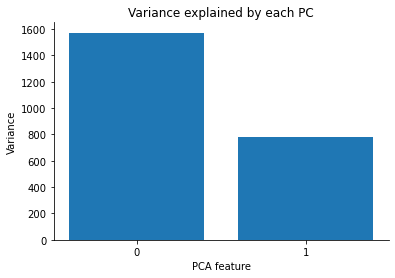

array([1571.73932434,  780.51036153])

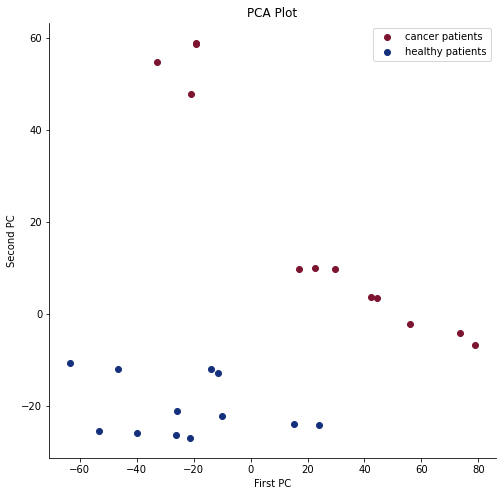

In [4]:
#THIS BLOCK PERFORMS THE PCA TEST ON THE NON-BATCH CORRECTED DATA 
#scale the data
#samples = featuretable.values.T
#sample_names = (featuretable.columns)
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_znormalised)
scaled_df_znormalised = scaler.transform(df_znormalised)

pca = PCA(n_components=2)
pca.fit(scaled_df_znormalised)
scaled_df_znormalised

#run PCA 
x_pca = pca.transform(scaled_df_znormalised)
scaled_df_znormalised.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC")
plt.ylabel("Second PC")

xs = x_pca[:,0]
ys = x_pca[:,1]
cancer = plt.scatter(xs[0:12], ys[0:12], c = "#7D1531", label = "cancer patients")
non_cancer = plt.scatter(xs[12:], ys[12:], c = "#15317E", label = "healthy patients")
label_color = ["#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E"]
# batch1 = plt.scatter(xs[0:12], ys[0:12], c = label_color)
# batch2 = plt.scatter(xs[12:], ys[12:], c = label_color)
#cancer_rep1 = plt.scatter(xs[])

plt.legend()
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show
pca.explained_variance_

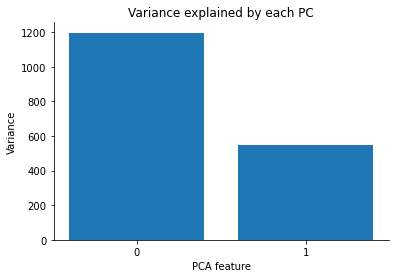

array([1196.56651311,  546.20022547])

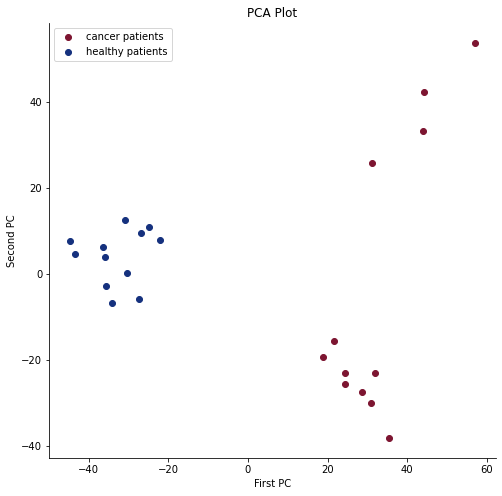

In [8]:
#THIS BLOCK PERFORMS THE PCA TEST ON THE BATCH CORRECTED DATA
#tranpose the z-normalised batch corrected data 
df_z_bc_bypatients_T = df_z_bc_bypatients.T
#scale the batch corrected data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_z_bc_bypatients_T)
scaled_df_bc_znormalised = scaler.transform(df_z_bc_bypatients_T)

pca = PCA(n_components=2)
pca.fit(scaled_df_bc_znormalised)
scaled_df_bc_znormalised

#run PCA 
x_pca = pca.transform(scaled_df_bc_znormalised)
scaled_df_bc_znormalised.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC")
plt.ylabel("Second PC")

xs = x_pca[:,0]
ys = x_pca[:,1]
cancer = plt.scatter(xs[0:12], ys[0:12], c = "#7D1531", label = "cancer patients")
non_cancer = plt.scatter(xs[12:], ys[12:], c = "#15317E", label = "healthy patients")
# label_color = ["#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E"]
# batch1 = plt.scatter(xs[0:12], ys[0:12], c = label_color)
# batch2 = plt.scatter(xs[12:], ys[12:], c = label_color)

plt.legend()
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show
pca.explained_variance_

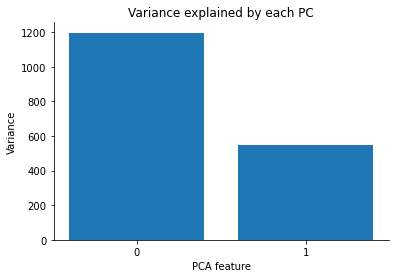

array([1196.56651311,  546.20022547])

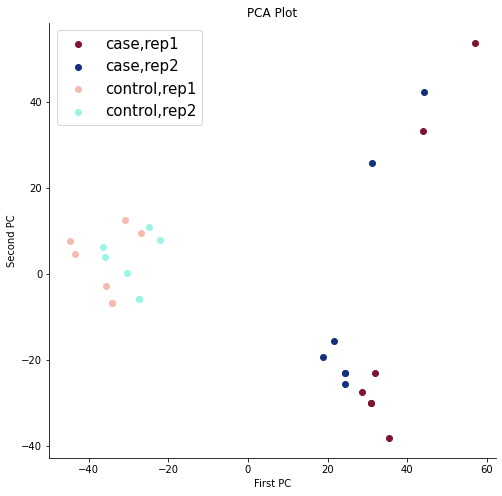

In [5]:
#THIS BLOCK PERFORMS THE PCA TEST ON THE BATCH CORRECTED DATA separate by batch
#tranpose the z-normalised batch corrected data 
df_z_bc_bypatients_T = df_z_bc_bypatients.T
#scale the batch corrected data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_z_bc_bypatients_T)
scaled_df_bc_znormalised = scaler.transform(df_z_bc_bypatients_T)

pca = PCA(n_components=2)
pca.fit(scaled_df_bc_znormalised)
scaled_df_bc_znormalised

#run PCA 
x_pca = pca.transform(scaled_df_bc_znormalised)
scaled_df_bc_znormalised.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC")
plt.ylabel("Second PC")

#target_ids = range(len(features))
xs = x_pca[:,0]
ys = x_pca[:,1]

#define colour labels 
cancer_rep1label = plt.scatter(xs[0:1], ys[0:1],c = "#7D1531", label = "case,rep1")
cancer_rep2label = plt.scatter(xs[1:2], ys[1:2], c = "#15317E", label = "case,rep2")
normal_rep1label = plt.scatter(xs[12:13], ys[12:13],c = "#F5BBAF", label = "control,rep1")
normal_rep2label = plt.scatter(xs[13:14], ys[13:14],c = "#9AF5E8", label = "control,rep2")

#for cancer patients
f = list(range(0,12))

for i in f:
    if i % 2 == 0:
        cancer_rep1 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#7D1531") 
    else:  
        cancer_rep2 = plt.scatter(xs[i:i+1],ys[i:i+1], c = "#15317E")
        
#for normal patients 
g = list(range(12,24))

for j in g:
    if j % 2 == 0: 
        normal_rep1 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#F5BBAF")
    else: 
        normal_rep2 = plt.scatter(xs[j:j+1], ys[j:j+1], c = "#9AF5E8")

plt.legend(prop={'size': 15})
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show
pca.explained_variance_

Text(0, 0.5, 'Variance')

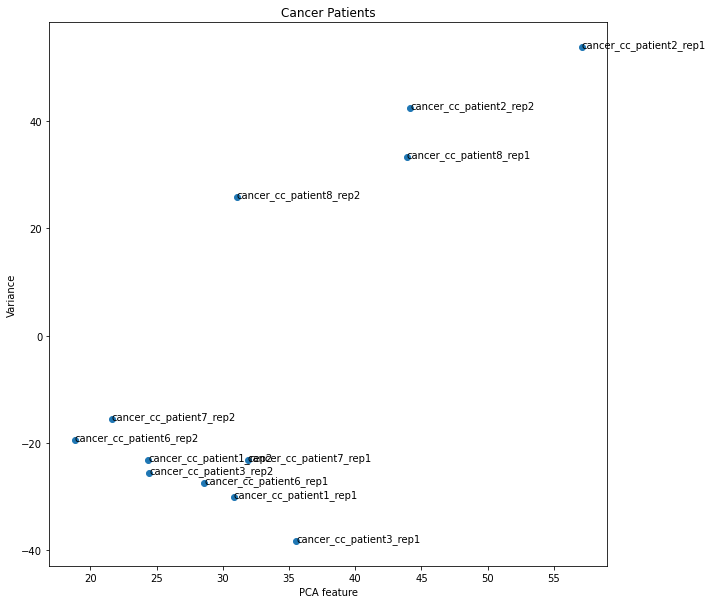

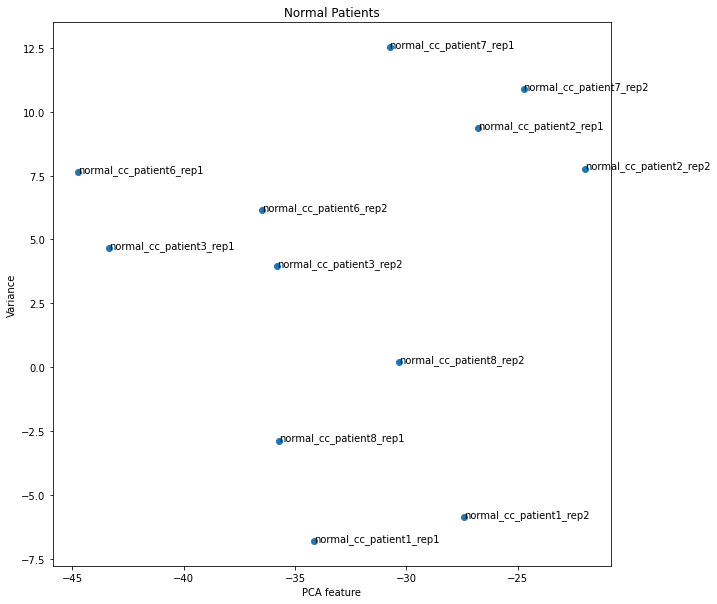

In [10]:
#cancer patients
cancer_n = df_z_bc_bypatients_T.index[0:12]
a = xs[0:12]
b = ys[0:12]

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(xs[0:12], ys[0:12])

for i, txt in enumerate(cancer_n):
    ax1.annotate(txt, (a[i], b[i]))
    
ax1.title.set_text('Cancer Patients')
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance')

#non cancer patients 
non_cancer_n = df_z_bc_bypatients_T.index[12:24]

c = xs[12:]
d = ys[12:]

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(xs[12:24], ys[12:24])
for b, txt in enumerate(non_cancer_n):
    ax2.annotate(txt, (c[b],d[b]))
    
ax2.title.set_text('Normal Patients')
ax2.set_xlabel('PCA feature')
ax2.set_ylabel('Variance')

## Feature selection
Data preparation was performed upstream, and through analyses via PCA, it is observed that both PC1 and PC2 were capable of class prediction, through generation of distinct clusters based on class effects. Batch effects contributed little to the clustering after batch correction. 

Now, the next step is to perform feature selection to extract the most relevant features. More specifically, it is to compare and extract the variables which are strongly discriminative between two groups. In this RC dataset, we aim to perform identification of differentially expressed genes (DEGs) between cancer and control patients. 

In this exercise, feature selection is performed at the level of the proteins. A common feature-selection workflow include the use of the two sample t-test, followed by the hypergeometric enrichment (subnet evaluation) test in order to evaluate protein enrichment in pathways. However, it is important to note that while such applications are common, it does not always guarantee the identification of high quality signatures (as cited in this study: https://www.comp.nus.edu.sg/~wongls/psZ/wilson-rbna2015.pdf).  

Our downstream analyses include the employment of the t-statistic, followed by the hypergeometric enrichment. Two sets of analyses will be presented: non-batch corrected and batch corrected data respectively.

## Preparation of pathway data for mapping 
Pathway data are obtained from pathway databases to allow for enrichment analyses. 

In this study, the MSigDB was used to obtain our gene sets. The C5 ontology gene set (GO: BP) was obtained and will be used for downstream enrichment analyses.

In [11]:
#this block prepares the dictionaries for gene mapping 
pathway_gene = {}
pathway_source = {}

with open('c5.gobp.txt') as f:
    for line in f:
        genepathway = line.split()[0]
        source = line.split()[1]
        gene_symbols = line.split()[2:]
        pathway_source[genepathway] = source
        pathway_gene[genepathway] = gene_symbols
        
#this block manages the converted genes 
#turn the converted genes to a dataframe
converted_genes = pd.read_csv('converted genes.txt', sep = '\t')
converted_genes.to_numpy()
converted_genes

#sort the converted genes
sortedgenes = converted_genes.sort_values('From')
sortedgenes

#retain the unique genes symbols and converts it into a list
uniquegenesarray = sortedgenes.drop_duplicates(subset=['From'])
uniquegenesSym = uniquegenesarray["To"].tolist()
uniquegenesFrom = uniquegenesarray["From"].tolist()

In [12]:
#this block drops the columns that are not mapped
for g in df_znormalised.columns:
    if g not in uniquegenesFrom:
        del df_znormalised[g]

df_znormalised_sorted = df_znormalised[sorted(df_znormalised.columns)]
df_znormalised_sorted
df_znormalised_sorted.shape

#rename the columns 
df_znormalised_sorted.columns = uniquegenesSym
df_znormalised_sorted

,RBM47,FER1L5,UBA6,ESYT2,SHTN1,SLC5A10,ILVBL,NBAS,FUOM,VWA8,...,TEX264,OAS3,IGF2BP2,NDUFB9,SQOR,USH1C,SLC4A4,SCIN,WASF2,SEC23IP
cancer_cc_patient1_rep1,-0.265619,-0.211037,-0.0320766,-0.212507,-0.271114,0.315394,-0.250774,-0.29019,-0.296139,-0.166206,...,-0.292651,-0.26514,-0.293331,-0.178242,-0.066465,-0.254514,-0.173506,0.032768,-0.245881,-0.182405
cancer_cc_patient1_rep2,-0.302102,-0.288925,-0.036475,-0.239409,-0.311661,0.338534,-0.279512,-0.331017,-0.339291,-0.180265,...,-0.335595,-0.306081,-0.334067,-0.208323,-0.0676822,-0.292311,-0.20091,-0.0535014,-0.280268,-0.199999
cancer_cc_patient2_rep1,-0.378474,-0.281831,-0.077672,-0.205153,-0.353254,-0.070888,-0.370049,-0.383609,-0.422974,-0.209585,...,-0.415584,-0.329971,-0.423204,-0.257841,0.312573,-0.371367,-0.221872,0.623471,-0.318407,-0.242188
cancer_cc_patient2_rep2,-0.380334,-0.302821,-0.0707307,-0.199177,-0.387507,-0.0949738,-0.370572,-0.385197,-0.422684,-0.21973,...,-0.41256,-0.319165,-0.422693,-0.261218,0.325559,-0.373395,-0.236401,0.503491,-0.314092,-0.257062
cancer_cc_patient3_rep1,-0.212371,-0.169364,-0.052183,-0.169897,-0.216189,0.0760718,-0.209046,-0.230381,-0.23432,-0.138568,...,-0.232355,-0.203154,-0.23232,-0.141609,-0.00016752,-0.205414,-0.118432,-0.0667091,-0.180275,-0.1683
cancer_cc_patient3_rep2,-0.204864,-0.135362,-0.0435325,-0.159453,-0.204815,0.144483,-0.195208,-0.215898,-0.217874,-0.141681,...,-0.216878,-0.195622,-0.218781,-0.146809,0.0515394,-0.188676,-0.117477,-0.0629536,-0.170855,-0.146742
cancer_cc_patient6_rep1,-0.310117,-0.192325,-0.144619,-0.253618,-0.313799,0.255016,-0.309522,-0.332936,-0.343693,-0.200729,...,-0.339449,-0.312279,-0.343288,-0.213049,0.022356,-0.290541,-0.192371,0.0875755,-0.275238,-0.221357
cancer_cc_patient6_rep2,-0.242256,-0.0905385,-0.11272,-0.196086,-0.236651,0.170961,-0.232391,-0.256897,-0.261223,-0.1521,...,-0.259124,-0.242631,-0.261128,-0.165271,0.0118134,-0.2229,-0.142133,-0.0156389,-0.213879,-0.186492
cancer_cc_patient7_rep1,-0.274832,-0.0844298,-0.11725,-0.183115,-0.250802,0.477528,-0.292389,-0.305582,-0.30955,-0.20677,...,-0.317313,-0.289382,-0.318676,-0.184605,-0.0937805,-0.282662,-0.176335,0.130037,-0.250499,-0.213362
cancer_cc_patient7_rep2,-0.252819,-0.0854614,-0.112239,-0.193442,-0.259571,0.539833,-0.262101,-0.272498,-0.277168,-0.178239,...,-0.282992,-0.266013,-0.284007,-0.17683,-0.0970344,-0.253158,-0.159101,0.0587286,-0.216124,-0.195258


## Feature selection on non-batch corrected data

### T-test 
The t-test is based on t-distribution. In biological studies, comparisons are often made between two populations of treatment. 

In the student's t-test, it evaluates whether the means of the measurement variable are different between two groups. The test statistic, ts, is calculated using a formula that has the difference between the means in the numerator; The denominator is the standard error of the difference in the means, which gets smaller as the sample variances decrease or the sample sizes increase.

#### Assumptions of the T-test
Observations within each group are assumed to be normally distributed. Hence, data distribution that are non-normal should undergo normalisation. A log2 transformation was already performed prior to this. 

#### Log2 Transformation 
The log transformation, is a widely used method to address skewed data, and are often used in biological research. 
Log2 transformation aids in conforming data to normality by reducing the skewness of the data. Log-transformed expression (or concentration) values model proportional changes rather than additive changes, which can be more appropriate for biological research (depends). 

Read more from this: https://www.researchgate.net/deref/https%3A%2F%2Fwww.biogazelle.com%2Fseven-tips-bio-statistical-analysis-gene-expression-data) 
However, log transformation is also not free from biases, covered here: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/

In [13]:
#this block performs the students' t-test to extract the differentially expressed genes 
from scipy import stats
##obtain each of the array 
#convert the genes into an array 
genearray = df_znormalised_sorted.columns.values

#convert samples into an array 
samplearray = df_znormalised_sorted.index.values

#obtain the numpy array 
new_df_sorted = df_znormalised_sorted.T
numpyarray = new_df_sorted.to_numpy() 

#set the alpha value 
alpha_value = 0.05 
count = 0
#for storage of DEG 
ttest_deg_sorted = []

#for storage of p values for subseuquent bonferroni correction
ttest_pvalue = []
for i in np.arange(len(genearray)):
    ttest = stats.ttest_ind(numpyarray[i,0:12],numpyarray[i,12:24])
    count += 1 
    ttest_pvalue.append(ttest.pvalue)
#check against the alpha value for significance [pvalues that are lesser than the alpha value]
    if ttest.pvalue < alpha_value: 
        ttest_deg_sorted.append(genearray[i]) #print out significant genes 
print(ttest_deg_sorted)
print(len(ttest_deg_sorted))

['FER1L5', 'UBA6', 'ESYT2', 'NBAS', 'VWA8', 'WDR91', 'ASPDH', 'PALM3', 'PGP', 'DRGX', 'C2CD4D', 'C19orf81', 'DNASE2', 'AGPS', 'TK2', 'PDLIM1', 'ACOT7', 'MYO1C', 'STXBP3', 'AP3B1', 'NDUFS8', 'PSMD11', 'PSMD12', 'CLIC1', 'EIF3F', 'PDHX', 'QSOX1', 'SAP18', 'PLOD2', 'HMGN4', 'NDUFA4', 'PSMD14', 'LAD1', 'CHL1', 'SDCBP', 'NOP56', 'DDX3X', 'PODXL', 'CES2', 'MAN2B1', 'FBP2', 'CUX2', 'COX7A2L', 'GAPDHS', 'HSPB6', 'COPE', 'AP3D1', 'CCS', 'PDCD5', 'SLC9A3R1', 'NRP1', 'TNPO2', 'APOL1', 'PSMA7', 'SCAMP3', 'PHYH', 'OPLAH', 'BCKDK', 'IFIT3', 'TAX1BP3', 'UBE2L6', 'UQCRQ', 'UQCR11', 'HGS', 'PPP1R12A', 'SLC27A2', 'XPO1', 'ZNF609', 'SPTBN2', 'SEC16A', 'SYNM', 'ERC2', 'SCAMP1', 'SCAMP2', 'ARPC1B', 'ARPC3', 'PFDN6', 'PMM2', 'HMGB3', 'NCAM2', 'ABCC4', 'P4HA2', 'ARPC5', 'TAPBP', 'FABP7', 'DHX15', 'CYB5B', 'PHGDH', 'NDUFS4', 'ARHGAP6', 'DYNC1LI2', 'SRGAP3', 'HSPA12A', 'HNRNPR', 'TXNL1', 'TPD52L2', 'SYNJ1', 'MGAM', 'HTRA2', 'AKR7A2', 'EPB41L2', 'TGOLN2', 'LAMTOR5', 'DENR', 'DNPH1', 'TRAPPC3', 'ZNF207', 'NDUFB3

### Bonferroni correction

In [14]:
#this block performs the bonferroni correction for differentially expressed genes obtained from the ttest manually without a module 
#approach 1: divide the per analysis alpha rate by the number of statistical analyses performed 
ttest_deg_corrected_sorted = []
ttest_pvalue_corrected_sorted = []

analyses_performed = 3123 
corrected_alphavalue = 0.05/analyses_performed

for i in np.arange(len(genearray)):
    ttest_corrected_sorted = stats.ttest_ind(numpyarray[i,0:12],numpyarray[i,12:24])
    ttest_pvalue_corrected_sorted.append(ttest_corrected_sorted.pvalue)
#check against the alpha value for significance [pvalues that are lesser than the alpha value]
    if ttest_corrected_sorted.pvalue < corrected_alphavalue: 
        ttest_deg_corrected_sorted.append(genearray[i]) #print out significant genes 

print(ttest_deg_corrected_sorted)
print(len(ttest_deg_corrected_sorted))

['UBA6', 'PDLIM1', 'NDUFS8', 'PDHX', 'NDUFA4', 'PSMD14', 'CHL1', 'DDX3X', 'FBP2', 'COX7A2L', 'PDCD5', 'SLC9A3R1', 'PSMA7', 'UQCRQ', 'PMM2', 'DHX15', 'NDUFS4', 'DYNC1LI2', 'HTRA2', 'NDUFA2', 'MYO1B', 'NUDT21', 'AHCYL1', 'NDUFS5', 'PLIN1', 'SPAG9', 'REV3L', 'EDF1', 'NOL3', 'CPNE3', 'COQ9', 'NDUFS7', 'PDCD6', 'ATP6V1G1', 'NDUFS6', 'NDUFS3', 'BANF1', 'EIF3G', 'IDH1', 'BBOX1', 'ATP5PD', 'ATP5MG', 'GLRX3', 'DDAH1', 'TOMM70', 'SEC24D', 'PRPF6', 'GLS', 'CEP152', 'AKR7A3', 'NDUFA7', 'NDUFA10', 'PGM3', 'HSPA4L', 'BAG2', 'AIFM1', 'EML2', 'NDUFB10', 'NAPSA', 'ADH1C', 'LDHA', 'GLUD1', 'CYB5R3', 'GSR', 'MT-CO2', 'PAH', 'PNP', 'PGK1', 'F9', 'CA2', 'ASS1', 'A2M', 'COL1A1', 'COL4A1', 'CRYAA', 'C1QB', 'TFRC', 'VTN', 'CAT', 'APOB', 'GAPDH', 'GNAI2', 'ATP1A1', 'ATP1B1', 'ALDOB', 'ALDH2', 'SLC25A5', 'PCCA', 'PCCB', 'EIF2S1', 'SERPINA7', 'PTMA', 'ATP5F1B', 'GPI', 'EPHX1', 'DBI', 'FABP1', 'LDHB', 'BPGM', 'FH', 'CD14', 'COL4A2', 'ENO2', 'ACAA1', 'GSTA2', 'LGALS1', 'QDPR', 'FBP1', 'ANXA4', 'CTSH', 'COX6C', 'CC

### Hypergeometric test

In [15]:
#mapping genes to the pathway using the hypergeometric test 
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

#parameters required 
hypo_M = len(pathway_gene) #total number of genes 
hypo_N = len(ttest_deg_corrected_sorted) #total number of DEGs

#obtaining n value (number of DEGs in pathway)
pathway_DEGs = {}
for pathway in pathway_gene.keys():
    hyper_n = 0
    for degs in ttest_deg_corrected_sorted:
        if degs in pathway_gene[pathway]:
            hyper_n += 1
#store the number of DEGs in pathway into a dictionary 
        pathway_DEGs[pathway] = hyper_n
#sort the dictionary to locate the highest most enriched pathway 
pathway_DEGs_sorted = dict(sorted(pathway_DEGs.items(), key=lambda item: item[1], reverse=True))
print(pathway_DEGs_sorted)
len(pathway_DEGs_sorted)

{'GOBP_SMALL_MOLECULE_METABOLIC_PROCESS': 196, 'GOBP_ORGANIC_ACID_METABOLIC_PROCESS': 149, 'GOBP_GENERATION_OF_PRECURSOR_METABOLITES_AND_ENERGY': 107, 'GOBP_ORGANONITROGEN_COMPOUND_BIOSYNTHETIC_PROCESS': 102, 'GOBP_INTRACELLULAR_TRANSPORT': 97, 'GOBP_ESTABLISHMENT_OF_PROTEIN_LOCALIZATION': 93, 'GOBP_PROTEIN_CONTAINING_COMPLEX_SUBUNIT_ORGANIZATION': 90, 'GOBP_CELLULAR_MACROMOLECULE_LOCALIZATION': 88, 'GOBP_MONOCARBOXYLIC_ACID_METABOLIC_PROCESS': 84, 'GOBP_ORGANOPHOSPHATE_METABOLIC_PROCESS': 83, 'GOBP_CELLULAR_AMIDE_METABOLIC_PROCESS': 82, 'GOBP_SMALL_MOLECULE_CATABOLIC_PROCESS': 81, 'GOBP_CARBOHYDRATE_DERIVATIVE_METABOLIC_PROCESS': 81, 'GOBP_LIPID_METABOLIC_PROCESS': 79, 'GOBP_NUCLEOBASE_CONTAINING_SMALL_MOLECULE_METABOLIC_PROCESS': 74, 'GOBP_ATP_METABOLIC_PROCESS': 73, 'GOBP_ORGANONITROGEN_COMPOUND_CATABOLIC_PROCESS': 72, 'GOBP_PROTEOLYSIS': 70, 'GOBP_APOPTOTIC_PROCESS': 68, 'GOBP_HOMEOSTATIC_PROCESS': 68, 'GOBP_TRANSMEMBRANE_TRANSPORT': 68, 'GOBP_CELLULAR_PROTEIN_CONTAINING_COMPLEX_AS

7481

In [16]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
#this obtains the hypergeometric test values and stores in a dictionary
pathway_hypertest = {}
hyper_M = len(pathway_gene) #total number of genes 
hyper_N = len(ttest_deg_corrected_sorted) #total number of DEGs
x = np.arange(0, hyper_n+1)

for key, value in pathway_DEGs_sorted.items():
    hyper_n = value
    res = hypergeom.cdf(x, hyper_M, hyper_n, hyper_N)
    pathway_hypertest[key] = res[0]
    
print(pathway_hypertest)

{'GOBP_SMALL_MOLECULE_METABOLIC_PROCESS': 9.31078168972656e-07, 'GOBP_ORGANIC_ACID_METABOLIC_PROCESS': 2.6939741984584302e-05, 'GOBP_GENERATION_OF_PRECURSOR_METABOLITES_AND_ENERGY': 0.0005347366620633592, 'GOBP_ORGANONITROGEN_COMPOUND_BIOSYNTHETIC_PROCESS': 0.0007622951032648822, 'GOBP_INTRACELLULAR_TRANSPORT': 0.0010864211675032792, 'GOBP_ESTABLISHMENT_OF_PROTEIN_LOCALIZATION': 0.0014421836693938215, 'GOBP_PROTEIN_CONTAINING_COMPLEX_SUBUNIT_ORGANIZATION': 0.0017833724617528715, 'GOBP_CELLULAR_MACROMOLECULE_LOCALIZATION': 0.002054478019121664, 'GOBP_MONOCARBOXYLIC_ACID_METABOLIC_PROCESS': 0.002726269089221564, 'GOBP_ORGANOPHOSPHATE_METABOLIC_PROCESS': 0.0029260030062718792, 'GOBP_CELLULAR_AMIDE_METABOLIC_PROCESS': 0.003140338880695181, 'GOBP_SMALL_MOLECULE_CATABOLIC_PROCESS': 0.0033703419458482363, 'GOBP_CARBOHYDRATE_DERIVATIVE_METABOLIC_PROCESS': 0.0033703419458482363, 'GOBP_LIPID_METABOLIC_PROCESS': 0.0038820039381025277, 'GOBP_NUCLEOBASE_CONTAINING_SMALL_MOLECULE_METABOLIC_PROCESS':

In [17]:
#filter and obtain enriched pathways 
enriched_pathways = {}
for key, value in pathway_hypertest.items(): 
    if value <0.05:
        enriched_pathways[key] = value 

print(enriched_pathways.keys())
print("The number of enriched pathways before batch correction:",len(enriched_pathways.keys()))

dict_keys(['GOBP_SMALL_MOLECULE_METABOLIC_PROCESS', 'GOBP_ORGANIC_ACID_METABOLIC_PROCESS', 'GOBP_GENERATION_OF_PRECURSOR_METABOLITES_AND_ENERGY', 'GOBP_ORGANONITROGEN_COMPOUND_BIOSYNTHETIC_PROCESS', 'GOBP_INTRACELLULAR_TRANSPORT', 'GOBP_ESTABLISHMENT_OF_PROTEIN_LOCALIZATION', 'GOBP_PROTEIN_CONTAINING_COMPLEX_SUBUNIT_ORGANIZATION', 'GOBP_CELLULAR_MACROMOLECULE_LOCALIZATION', 'GOBP_MONOCARBOXYLIC_ACID_METABOLIC_PROCESS', 'GOBP_ORGANOPHOSPHATE_METABOLIC_PROCESS', 'GOBP_CELLULAR_AMIDE_METABOLIC_PROCESS', 'GOBP_SMALL_MOLECULE_CATABOLIC_PROCESS', 'GOBP_CARBOHYDRATE_DERIVATIVE_METABOLIC_PROCESS', 'GOBP_LIPID_METABOLIC_PROCESS', 'GOBP_NUCLEOBASE_CONTAINING_SMALL_MOLECULE_METABOLIC_PROCESS', 'GOBP_ATP_METABOLIC_PROCESS', 'GOBP_ORGANONITROGEN_COMPOUND_CATABOLIC_PROCESS', 'GOBP_PROTEOLYSIS', 'GOBP_APOPTOTIC_PROCESS', 'GOBP_HOMEOSTATIC_PROCESS', 'GOBP_TRANSMEMBRANE_TRANSPORT', 'GOBP_CELLULAR_PROTEIN_CONTAINING_COMPLEX_ASSEMBLY', 'GOBP_RESPONSE_TO_OXYGEN_CONTAINING_COMPOUND', 'GOBP_INTRACELLULAR_PR

## Feature selection on batch corrected data 

In [18]:
#this block drops the columns that are not mapped
df_bc = df_batchcorrected.T 
for f in df_bc.columns:
    if f not in uniquegenesFrom:
        del df_bc[f]

df_bc_sorted = df_bc[sorted(df_bc.columns)]
df_bc_sorted
df_bc_sorted.shape

#rename the columns 
df_bc_sorted.columns = uniquegenesSym
df_bc_sorted

,RBM47,FER1L5,UBA6,ESYT2,SHTN1,SLC5A10,ILVBL,NBAS,FUOM,VWA8,...,TEX264,OAS3,IGF2BP2,NDUFB9,SQOR,USH1C,SLC4A4,SCIN,WASF2,SEC23IP
cancer_cc_patient1_rep1,14.022159,15.268003,17.123622,15.388811,13.805853,18.267107,14.674609,12.365952,11.245474,15.973880,...,12.099576,14.089155,11.983023,15.795378,16.774554,14.431669,15.815775,17.276149,14.713203,15.875557
cancer_cc_patient1_rep2,14.476114,15.054643,17.211740,15.746177,14.140102,18.395183,14.980664,12.882063,11.669140,16.389239,...,12.244157,14.339314,12.441987,16.178362,17.154333,14.784781,16.298268,17.273671,15.032518,16.146718
cancer_cc_patient2_rep1,14.359514,15.694479,17.148094,16.544720,14.936194,16.948114,14.656810,14.378265,12.173928,16.392897,...,13.100431,15.440045,12.262237,15.955238,18.263422,14.507374,16.204644,18.707221,15.514709,16.259989
cancer_cc_patient2_rep2,14.708183,16.059348,17.304575,16.663928,14.533336,17.370701,14.873556,14.474567,12.775541,16.617360,...,13.340376,15.640164,12.668573,16.376738,18.330543,14.902033,16.602071,18.669054,15.731689,16.295295
cancer_cc_patient3_rep1,13.992633,15.306767,16.986695,15.443823,13.794692,17.630037,14.243261,12.354939,11.409842,15.953885,...,12.048566,14.542851,12.076849,15.878988,17.283603,14.344301,16.178441,16.667524,15.283192,15.455013
cancer_cc_patient3_rep2,13.696519,15.940204,16.816400,15.398128,13.676614,17.891093,14.202461,12.377467,11.958175,15.786439,...,12.086830,14.204882,11.637642,15.726419,17.440003,14.544550,16.197440,16.796398,15.062203,15.630917
cancer_cc_patient6_rep1,14.023217,15.995959,16.462606,15.340468,13.914874,18.052119,14.092584,12.863079,11.375300,15.955326,...,12.252208,13.974283,11.530451,15.789394,17.361794,14.642101,15.974116,17.534252,15.029190,15.818945
cancer_cc_patient6_rep2,13.814986,16.617162,16.398424,15.301238,14.071143,17.895778,14.223200,12.455812,11.628282,15.998761,...,11.998079,13.782237,11.571858,15.866511,17.236860,14.615287,16.184259,17.156871,14.842023,15.467812
cancer_cc_patient7_rep1,14.541059,16.814217,16.619985,16.128318,15.143754,18.652668,13.848674,13.183399,12.834281,15.690660,...,11.815898,14.006745,11.534392,15.960402,16.696287,14.214431,16.006940,17.726659,15.154639,15.706999
cancer_cc_patient7_rep2,14.175909,16.646556,16.419404,15.536935,13.891768,18.563611,13.764071,13.017990,12.564680,15.799877,...,11.583397,13.577227,11.325868,15.840507,16.599226,14.201118,16.080471,17.421733,15.104551,15.513453


### T-test (batch corrected)

In [19]:
#this block performs the students' t-test to extract the differentially expressed genes 
from scipy import stats
##obtain each of the array 
#convert the genes into an array 
genearray_bc = df_bc_sorted.columns.values

#convert samples into an array 
samplearray_bc = df_bc_sorted.index.values

#obtain the numpy array 
new_df_sorted_bc = df_bc_sorted.T
numpyarray_bc = new_df_sorted_bc.to_numpy() 

#set the alpha value 
alpha_value = 0.05 
count_bc = 0
#for storage of DEG 
ttest_deg_sorted_bc = []

#for storage of p values for subseuquent bonferroni correction
ttest_pvalue_bc = []
for i in np.arange(len(genearray_bc)):
    ttest_bc = stats.ttest_ind(numpyarray_bc[i,0:12],numpyarray_bc[i,12:24])
    count += 1 
    ttest_pvalue_bc.append(ttest_bc.pvalue)
#check against the alpha value for significance [pvalues that are lesser than the alpha value]
    if ttest_bc.pvalue < alpha_value: 
        ttest_deg_sorted_bc.append(genearray[i]) #print out significant genes 
print(ttest_deg_sorted_bc)
print(len(ttest_deg_sorted_bc))

['RBM47', 'FER1L5', 'UBA6', 'ILVBL', 'FUOM', 'VWA8', 'WDR91', 'PGP', 'DRGX', 'C19orf81', 'AGPS', 'PDLIM1', 'ACOT7', 'MYO1C', 'SNAP23', 'NDUFS8', 'PSMD12', 'CLIC1', 'EIF3F', 'PDHX', 'SULT1C2', 'QSOX1', 'IPO5', 'SAP18', 'RTCA', 'AGRN', 'PLOD2', 'SLC17A3', 'HMGN4', 'NDUFA4', 'PSMD14', 'BIN1', 'LAD1', 'CHL1', 'VWA5A', 'NOP56', 'DDX3X', 'PODXL', 'CES2', 'FBP2', 'CUX2', 'COX7A2L', 'GAPDHS', 'COPE', 'AP3D1', 'CCS', 'ABLIM1', 'PDCD5', 'SLC9A3R1', 'TNPO2', 'APOL1', 'PSMA7', 'SCAMP3', 'PHYH', 'IFIT3', 'MGST3', 'UBE2L6', 'CASK', 'UQCRQ', 'UQCR11', 'SLC27A2', 'XPO1', 'ZNF609', 'SYNM', 'SCAMP2', 'ARPC1B', 'ARPC3', 'PFDN6', 'KMO', 'SLC22A2', 'CLIC2', 'SURF4', 'PMM2', 'HMGB3', 'NCAM2', 'STX7', 'ARPC5', 'FABP7', 'DHX15', 'PHGDH', 'NDUFS4', 'DYNC1LI2', 'HSPA12A', 'EEF1E1', 'HNRNPR', 'SYNJ1', 'MGAM', 'HTRA2', 'AKR7A2', 'EPB41L2', 'LAMTOR5', 'DENR', 'DNPH1', 'TIMM44', 'NDUFB3', 'NDUFA2', 'BUB3', 'ACTN4', 'SYNGR2', 'NARS1', 'MYO1B', 'IDH3B', 'CALU', 'AHCYL1', 'XPNPEP2', 'NDUFS5', 'TIMM8A', 'GMFG', 'PLIN1'

### Bonferroni correction (batch corrected)

In [20]:
#this block performs the bonferroni correction for differentially expressed genes obtained from the ttest manually without a module 
#approach 1: divide the per analysis alpha rate by the number of statistical analyses performed 
ttest_deg_corrected_sorted_bc = []
ttest_pvalue_corrected_sorted_bc = []

analyses_performed = 3123 
corrected_alphavalue = 0.05/analyses_performed

for i in np.arange(len(genearray_bc)):
    ttest_corrected_sorted_bc = stats.ttest_ind(numpyarray_bc[i,0:12],numpyarray_bc[i,12:24])
    ttest_pvalue_corrected_sorted_bc.append(ttest_corrected_sorted_bc.pvalue)
#check against the alpha value for significance [pvalues that are lesser than the alpha value]
    if ttest_corrected_sorted_bc.pvalue < corrected_alphavalue: 
        ttest_deg_corrected_sorted_bc.append(genearray_bc[i]) #print out significant genes 

print(ttest_deg_corrected_sorted_bc)
print(len(ttest_deg_corrected_sorted_bc))

['FER1L5', 'PDLIM1', 'SNAP23', 'NDUFS8', 'SLC17A3', 'NDUFA4', 'PODXL', 'FBP2', 'COX7A2L', 'SLC9A3R1', 'PSMA7', 'PHYH', 'UQCRQ', 'UQCR11', 'DHX15', 'NDUFS4', 'MGAM', 'NDUFS5', 'SPAG9', 'CEP104', 'DSCAM', 'NOL3', 'NDUFS7', 'CDH16', 'PDCD6', 'ATP6V1G1', 'NDUFS6', 'NDUFB1', 'NDUFS3', 'BANF1', 'IDH1', 'BBOX1', 'ATP5PD', 'ATP5MG', 'NEBL', 'TOMM70', 'GLS', 'CEP152', 'AKR7A3', 'NDUFA7', 'NDUFA10', 'AIFM1', 'ABHD16A', 'NUDT3', 'NDUFB10', 'NAPSA', 'ADH1B', 'ADH1C', 'LDHA', 'GLUD1', 'CYB5R3', 'GSR', 'MT-CO2', 'PNP', 'EGFR', 'PGK1', 'F9', 'MT-ATP6', 'CA2', 'A2M', 'COL1A1', 'COL4A1', 'CRYAA', 'RBP4', 'CAT', 'ALDOA', 'APOB', 'GAPDH', 'MT1F', 'ATP1A1', 'ATP1B1', 'ALDOB', 'HMGN1', 'SLC25A5', 'PCCA', 'PCCB', 'UGT2B4', 'ATP5F1B', 'ENO1', 'GPI', 'NPM1', 'EPHX1', 'DBI', 'FABP1', 'LDHB', 'ANXA2', 'TUBB', 'PFN1', 'BPGM', 'FH', 'HSPA1A', 'VIM', 'SERPINF2', 'ANXA5', 'ENO2', 'ACAA1', 'GSTA2', 'LGALS1', 'QDPR', 'FBP1', 'ANXA4', 'CTSH', 'COX6C', 'ALDOC', 'H1-4', 'PTPRF', 'COX5B', 'UMPS', 'PDHB', 'DBT', 'PYGM', '

### Hypergeometric test (batch corrected)

In [21]:
#mapping genes to the pathway using the hypergeometric test 
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

#parameters required 
hypo_M = len(pathway_gene) #total number of genes 
hypo_N = len(ttest_deg_corrected_sorted_bc) #total number of DEGs

#obtaining n value (number of DEGs in pathway)
pathway_DEGs_bc = {}
for pathway in pathway_gene.keys():
    hyper_n_bc = 0
    for degs_bc in ttest_deg_corrected_sorted_bc:
        if degs_bc in pathway_gene[pathway]:
            hyper_n_bc += 1
#store the number of DEGs in pathway into a dictionary 
        pathway_DEGs_bc[pathway] = hyper_n_bc
#sort the dictionary to locate the highest most enriched pathway 
pathway_DEGs_sorted_bc = dict(sorted(pathway_DEGs.items(), key=lambda item: item[1], reverse=True))
print(pathway_DEGs_sorted_bc)
print(len(pathway_DEGs_sorted_bc))

{'GOBP_SMALL_MOLECULE_METABOLIC_PROCESS': 196, 'GOBP_ORGANIC_ACID_METABOLIC_PROCESS': 149, 'GOBP_GENERATION_OF_PRECURSOR_METABOLITES_AND_ENERGY': 107, 'GOBP_ORGANONITROGEN_COMPOUND_BIOSYNTHETIC_PROCESS': 102, 'GOBP_INTRACELLULAR_TRANSPORT': 97, 'GOBP_ESTABLISHMENT_OF_PROTEIN_LOCALIZATION': 93, 'GOBP_PROTEIN_CONTAINING_COMPLEX_SUBUNIT_ORGANIZATION': 90, 'GOBP_CELLULAR_MACROMOLECULE_LOCALIZATION': 88, 'GOBP_MONOCARBOXYLIC_ACID_METABOLIC_PROCESS': 84, 'GOBP_ORGANOPHOSPHATE_METABOLIC_PROCESS': 83, 'GOBP_CELLULAR_AMIDE_METABOLIC_PROCESS': 82, 'GOBP_SMALL_MOLECULE_CATABOLIC_PROCESS': 81, 'GOBP_CARBOHYDRATE_DERIVATIVE_METABOLIC_PROCESS': 81, 'GOBP_LIPID_METABOLIC_PROCESS': 79, 'GOBP_NUCLEOBASE_CONTAINING_SMALL_MOLECULE_METABOLIC_PROCESS': 74, 'GOBP_ATP_METABOLIC_PROCESS': 73, 'GOBP_ORGANONITROGEN_COMPOUND_CATABOLIC_PROCESS': 72, 'GOBP_PROTEOLYSIS': 70, 'GOBP_APOPTOTIC_PROCESS': 68, 'GOBP_HOMEOSTATIC_PROCESS': 68, 'GOBP_TRANSMEMBRANE_TRANSPORT': 68, 'GOBP_CELLULAR_PROTEIN_CONTAINING_COMPLEX_AS

In [22]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
#this obtains the hypergeometric test values and stores in a dictionary
pathway_hypertest_bc = {}
hyper_M = len(pathway_gene) #total number of genes 
hyper_N = len(ttest_deg_corrected_sorted_bc) #total number of DEGs
x = np.arange(0, hyper_n_bc+1)

for key, value in pathway_DEGs_sorted.items():
    hyper_n_bc = value
    res = hypergeom.cdf(x, hyper_M, hyper_n_bc, hyper_N)
    pathway_hypertest_bc[key] = res[0]
    
print(pathway_hypertest_bc)

{'GOBP_SMALL_MOLECULE_METABOLIC_PROCESS': 1.5988349225799633e-06, 'GOBP_ORGANIC_ACID_METABOLIC_PROCESS': 4.057799369513608e-05, 'GOBP_GENERATION_OF_PRECURSOR_METABOLITES_AND_ENERGY': 0.0007169720165540628, 'GOBP_ORGANONITROGEN_COMPOUND_BIOSYNTHETIC_PROCESS': 0.0010080681166255497, 'GOBP_INTRACELLULAR_TRANSPORT': 0.0014170129688745644, 'GOBP_ESTABLISHMENT_OF_PROTEIN_LOCALIZATION': 0.0018604002780634908, 'GOBP_PROTEIN_CONTAINING_COMPLEX_SUBUNIT_ORGANIZATION': 0.0022815887352672457, 'GOBP_CELLULAR_MACROMOLECULE_LOCALIZATION': 0.0026139904606922244, 'GOBP_MONOCARBOXYLIC_ACID_METABOLIC_PROCESS': 0.003430739020993427, 'GOBP_ORGANOPHOSPHATE_METABOLIC_PROCESS': 0.0036719628584755567, 'GOBP_CELLULAR_AMIDE_METABOLIC_PROCESS': 0.003930110399229772, 'GOBP_SMALL_MOLECULE_CATABOLIC_PROCESS': 0.004206366351479312, 'GOBP_CARBOHYDRATE_DERIVATIVE_METABOLIC_PROCESS': 0.004206366351479312, 'GOBP_LIPID_METABOLIC_PROCESS': 0.004818361838829838, 'GOBP_NUCLEOBASE_CONTAINING_SMALL_MOLECULE_METABOLIC_PROCESS': 

In [23]:
#filter and obtain enriched pathways 
enriched_pathways_bc = {}
for key, value in pathway_hypertest_bc.items(): 
    if value <0.05:
        enriched_pathways_bc[key] = value 

print(enriched_pathways_bc.keys())
print("The number of enriched pathways after batch correction:", len(enriched_pathways_bc.keys()))

dict_keys(['GOBP_SMALL_MOLECULE_METABOLIC_PROCESS', 'GOBP_ORGANIC_ACID_METABOLIC_PROCESS', 'GOBP_GENERATION_OF_PRECURSOR_METABOLITES_AND_ENERGY', 'GOBP_ORGANONITROGEN_COMPOUND_BIOSYNTHETIC_PROCESS', 'GOBP_INTRACELLULAR_TRANSPORT', 'GOBP_ESTABLISHMENT_OF_PROTEIN_LOCALIZATION', 'GOBP_PROTEIN_CONTAINING_COMPLEX_SUBUNIT_ORGANIZATION', 'GOBP_CELLULAR_MACROMOLECULE_LOCALIZATION', 'GOBP_MONOCARBOXYLIC_ACID_METABOLIC_PROCESS', 'GOBP_ORGANOPHOSPHATE_METABOLIC_PROCESS', 'GOBP_CELLULAR_AMIDE_METABOLIC_PROCESS', 'GOBP_SMALL_MOLECULE_CATABOLIC_PROCESS', 'GOBP_CARBOHYDRATE_DERIVATIVE_METABOLIC_PROCESS', 'GOBP_LIPID_METABOLIC_PROCESS', 'GOBP_NUCLEOBASE_CONTAINING_SMALL_MOLECULE_METABOLIC_PROCESS', 'GOBP_ATP_METABOLIC_PROCESS', 'GOBP_ORGANONITROGEN_COMPOUND_CATABOLIC_PROCESS', 'GOBP_PROTEOLYSIS', 'GOBP_APOPTOTIC_PROCESS', 'GOBP_HOMEOSTATIC_PROCESS', 'GOBP_TRANSMEMBRANE_TRANSPORT', 'GOBP_CELLULAR_PROTEIN_CONTAINING_COMPLEX_ASSEMBLY', 'GOBP_RESPONSE_TO_OXYGEN_CONTAINING_COMPOUND', 'GOBP_INTRACELLULAR_PR

In [24]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index = df_z_bc_bypatients_T.columns)
loadings

sort_by_PC1 = loadings.sort_values(['PC1'])
print(sort_by_PC1.head())

sort_by_PC2 = loadings.sort_values(['PC2'])
print(sort_by_PC2.head())

                 PC1       PC2
Unnamed: 0                    
P80404     -0.029024  0.001081
P38117     -0.028988  0.002090
Q02252     -0.028913 -0.004281
P53597     -0.028890  0.000163
Q9Y6N9     -0.028863  0.000695
                 PC1       PC2
Unnamed: 0                    
P32119     -0.002525 -0.041804
P35237      0.000269 -0.040702
P28161     -0.000446 -0.040357
P02730      0.003647 -0.040308
P02765     -0.002402 -0.040126


## RMSE: 
### Checking for over-correction of batch correction

### This block performs the RMSE using max-min (in each protein) for normalisation

<AxesSubplot:ylabel='Density'>

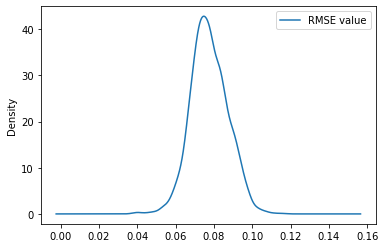

In [25]:
from sklearn.metrics import mean_squared_error, r2_score 

#obtain the pathway names 
genes = featuretable.columns.tolist()

#convert dataframe object to numpy object 
np_logtransformed = df2_logtransformed.to_numpy() 
np_batchcorrected = df_batchcorrected.to_numpy()

#iterates through the indices of the genes 
n_samples = list(range(3123))
res = []
res_normalised = []

#obtain the gene names 
for n in n_samples:
    rmse = mean_squared_error(np_logtransformed[n], np_batchcorrected[n], squared = False)
#non-normalised rmse result
    res.append(rmse)
    
#normalisation using max - min and store in dictionary 
    denom = max(np_logtransformed[n]) - min(np_logtransformed[n])
    res_normalised.append(rmse/denom)
    df_res = pd.DataFrame(res_normalised, columns = ["RMSE value"])
    
#obtain the normalised result
df_res.index = genes
df_res_sorted = df_res.sort_values(by = ["RMSE value"], ascending = False)

#plot kde
kde_res = df_res_sorted.plot.kde()
kde_res

### This block performs the RMSE using mean for normalisation

<AxesSubplot:ylabel='Density'>

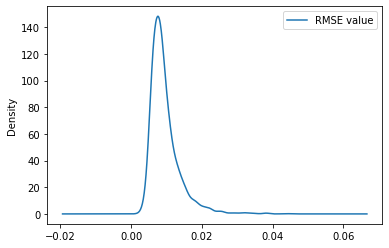

In [32]:
#normalise by mean

from sklearn.metrics import mean_squared_error, r2_score 

#obtain the pathway names 
genes = featuretable.columns.tolist()

#convert dataframe object to numpy object 
np_logtransformed = df2_logtransformed.to_numpy() 
np_batchcorrected = df_batchcorrected.to_numpy()

#iterates through the indices of the genes 
n_samples = list(range(3123))
res = []
res_normalised = []
col_mean_vals = []

#obtain the gene names 
for n in n_samples:
    rmse = mean_squared_error(np_logtransformed[n], np_batchcorrected[n], squared = False)
#non-normalised rmse result
    res.append(rmse)
    
#normalisation using max - min and store in dictionary 
    col_mean = np.average(np_logtransformed[n])
    col_mean_vals.append(col_mean)
    res_normalised.append(rmse/col_mean)
    df_res = pd.DataFrame(res_normalised, columns = ["RMSE value"])
    
#obtain the normalised result
df_res.index = genes
df_res_sorted = df_res.sort_values(by = ["RMSE value"], ascending = False)

#plot kde
kde_res = df_res_sorted.plot.kde()
kde_res

### This block runs the frequency histogram for the mean normalised data

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

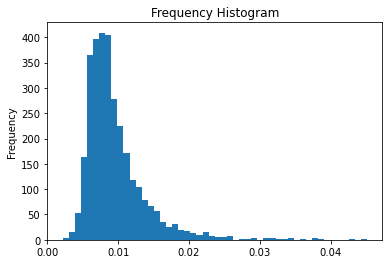

In [33]:
import matplotlib.pyplot as plt 
plt.hist(res_normalised, bins = 50)
plt.gca().set(title = "Frequency Histogram", ylabel = "Frequency")

### This block sorts the RMSE values for the min max normalised data

In [29]:
# #normalisation using max - min and store in dictionary 
# denom = max(np_logtransformed[n]) - min(np_logtransformed[n])
# res_normalised.append(rmse/denom)
# df_res = pd.DataFrame(res_normalised, columns = ["RMSE value"])
    
# #obtain normalised result and sort from largest RMSE value to smallest RMSE value 
# df_res_sorted = df_res.sort_values(by = ['RMSE value'])
# print(df_res_sorted)

      RMSE value
457     0.002137
1605    0.002740
201     0.002870
808     0.003114
2117    0.003303
...          ...
1902    0.038202
2151    0.038464
50      0.043287
1342    0.045122
3123    0.095463

[3124 rows x 1 columns]


### This block plots the frequency histogram for the non-normalised data

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

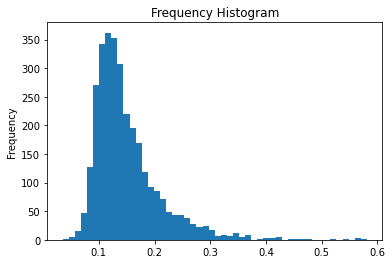

In [30]:
import matplotlib.pyplot as plt 
plt.hist(res, bins = 50)
plt.gca().set(title = "Frequency Histogram", ylabel = "Frequency")

### This block performs the linear regerssion for the mean-normalised data

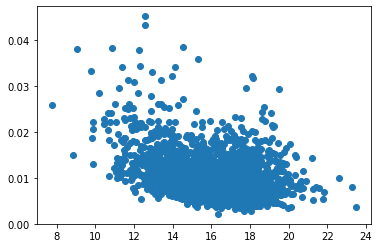

array([-0.00077429])

In [34]:
x = res_normalised
y = col_mean_vals 
plt.scatter(y,x)
plt.show()

y2 = np.reshape(np.array(y), (3123,1))

from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(y2, np.array(x))
lr.coef_




In [ ]:
lr.coef

# NeuCom 


In [ ]:
#create a list of class labels 
class_labels = ["case"] * 12 
control_elements = ["control"] * 12
class_labels.extend(control_elements)

#pass the list into datframe as a new column 
df_withlabels = featuretable
df_withlabels['Class Labels'] = class_labels
df_withlabels.T
df_withlabels.to_csv(r'C:\Users\KLIM089\Desktop\Kai\Coding projects\df_withlabels.txt', sep = ' ')
print(df_withlabels)

In [ ]:
df_res_sorted

## Batch correction on non-logtransformed data

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


<AxesSubplot:ylabel='Density'>

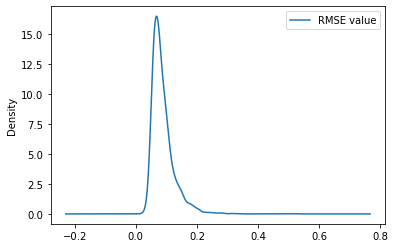

In [39]:
#df2
batch = [1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2]
df_nonlc_batchcorrected = pycombat(df2,batch)
df_nonlc_batchcorrected

#normalise by mean

from sklearn.metrics import mean_squared_error, r2_score 

#obtain the pathway names 
genes = featuretable.columns.tolist()

#convert dataframe object to numpy object 
np_nonlc = df2.to_numpy() 
np_nonlcbc = df_nonlc_batchcorrected.to_numpy()

#iterates through the indices of the genes 
n_samples = list(range(3123))
res_nonlc = []
res_normalised_nonlc = []
col_mean_vals_nonlc = []

#obtain the gene names 
for n in n_samples:
    rmse_nonlc = mean_squared_error(np_nonlc[n], np_nonlcbc[n], squared = False)
#non-normalised rmse result
    res_nonlc.append(rmse_nonlc)
    
#normalisation using max - min and store in dictionary 
    col_mean_nonlc = np.average(np_nonlc[n])
    col_mean_vals_nonlc.append(col_mean_nonlc)
    res_normalised_nonlc.append(rmse_nonlc/col_mean_nonlc)
    df_res_nonlc = pd.DataFrame(res_normalised_nonlc, columns = ["RMSE value"])
    
#obtain the normalised result
df_res_nonlc.index = genes
df_res_nonlc_sorted = df_res_nonlc.sort_values(by = ["RMSE value"], ascending = False)

#plot kde
kde_res_nonlc = df_res_nonlc_sorted.plot.kde()
kde_res_nonlc

[Text(0.5, 1.0, 'Frequency Histogram of Non-Log Transformed Normalised Data'),
 Text(0, 0.5, 'Frequency')]

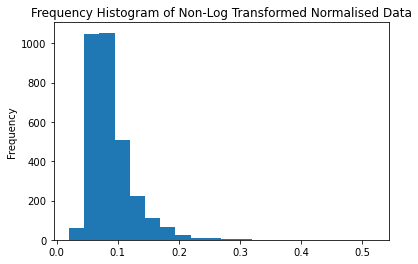

In [52]:
#plots the data with normalised non-log transformed data 
import matplotlib.pyplot as plt 
plt.hist(res_normalised_nonlc, bins = 20)
plt.gca().set(title = "Frequency Histogram of Non-Log Transformed Normalised Data", ylabel = "Frequency")

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

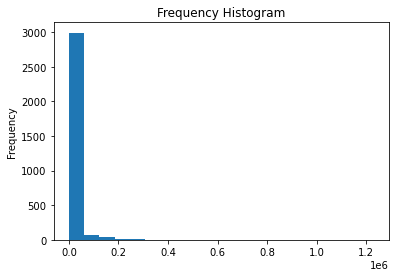

In [53]:
#plots the data with normalised non-log non-transformed data
import matplotlib.pyplot as plt 
plt.hist(res_nonlc, bins = 20)
plt.gca().set(title = "Frequency Histogram", ylabel = "Frequency")

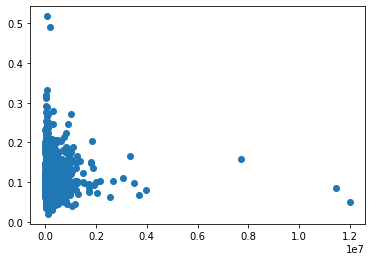

In [54]:
x = col_mean_vals_nonlc 
y = res_normalised_nonlc
plt.scatter(x,y)
plt.show()

# y2 = np.reshape(np.array(y), (3123,1))

# from sklearn.linear_model import LinearRegression
# lr = LinearRegression().fit(y2, np.array(x))
# lr.coef_

## This block performs the quantile normalisation 

,Unnamed: 0,cancer_cc_patient1_rep1,cancer_cc_patient1_rep2,cancer_cc_patient2_rep1,cancer_cc_patient2_rep2,cancer_cc_patient3_rep1,cancer_cc_patient3_rep2,cancer_cc_patient6_rep1,cancer_cc_patient6_rep2,cancer_cc_patient7_rep1,cancer_cc_patient7_rep2,cancer_cc_patient8_rep1,cancer_cc_patient8_rep2
0,A0AV96,230,250,180,180,371,170,290,130,200,140,340,190
1,A0AVI2,300,410,540,561,381,281,451,200,340,190,480,260
2,A0AVT1,460,510,601,791,411,390,530,460,440,300,500,270
3,A0FGR8,810,660,1182,1315,540,420,651,520,530,350,520,380
4,A0MZ66,851,930,1422,1622,600,670,960,530,730,380,612,540
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,Q9Y6N9,4854650,5817720,5652010,5481010,5812670,4565180,5242790,4358960,5540820,4793230,4669480,3683121
3119,Q9Y6R1,5524890,6244660,5791970,6132900,6247810,4670990,5938500,5305450,6244460,5187200,5000280,3760260
3120,Q9Y6U3,6220350,7158280,5821210,6224400,11848400,15670520,6377630,5564720,7686570,8681260,5208610,3948710
3121,Q9Y6W5,16740310,11197000,7404680,7837740,20115710,18209390,9854030,13259770,12533900,12264160,5394350,4580990
